#Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Carga imagenes desde archivo

In [4]:
#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 
img2 = cv2.imread('img.jpg')

Convierte a grises para procesar

(512, 512)


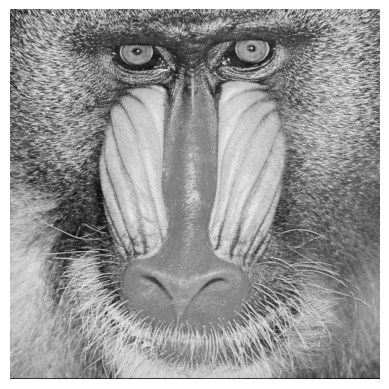

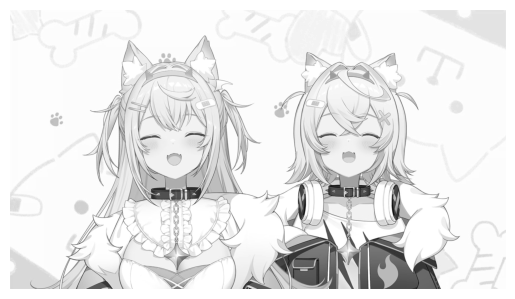

In [5]:
#Conversión a grises de la original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gris2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

print(gris.shape)
#Muestra, indicando el mapa de color de grises
#Eliminamos etiquetas de los ejes
plt.figure()
plt.axis("off")
plt.imshow(gris, cmap='gray') 
plt.show()

plt.figure()
plt.axis("off")
plt.imshow(gris2, cmap='gray') 
plt.show()


Canny, detector de bordes multietapa

[[  0 255   0 ...   0 255   0]
 [255 255   0 ...   0   0 255]
 [  0   0 255 ... 255 255   0]
 ...
 [  0   0   0 ...   0   0 255]
 [  0 255 255 ... 255 255 255]
 [255   0   0 ...   0   0   0]]


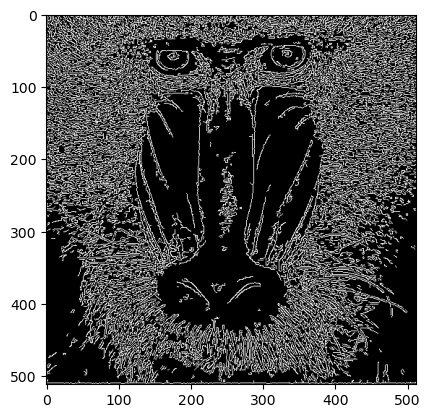

In [6]:
#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)
print(canny)
#Muestra resultado
plt.imshow(canny, cmap='gray') 
plt.show()


Definida la imagen de salida de Canny, salida 0 o 255, obtiene el número de píxeles no nulos por columna y fila y visualiza.

TAREA: Realiza la cuenta de píxeles blancos por filas, determina el máximo para filas y columnas (uno para cada) y muestra el número de valores que superan en cada caso 0.95*máximo.

El máximo valor para filas es: 103530
El máximo valor para columnas es: 48705
Número de valores que superan el 95% del máximo en filas: 1
Número de valores que superan el 95% del máximo en columnas: 8


(0.0, 512.0)

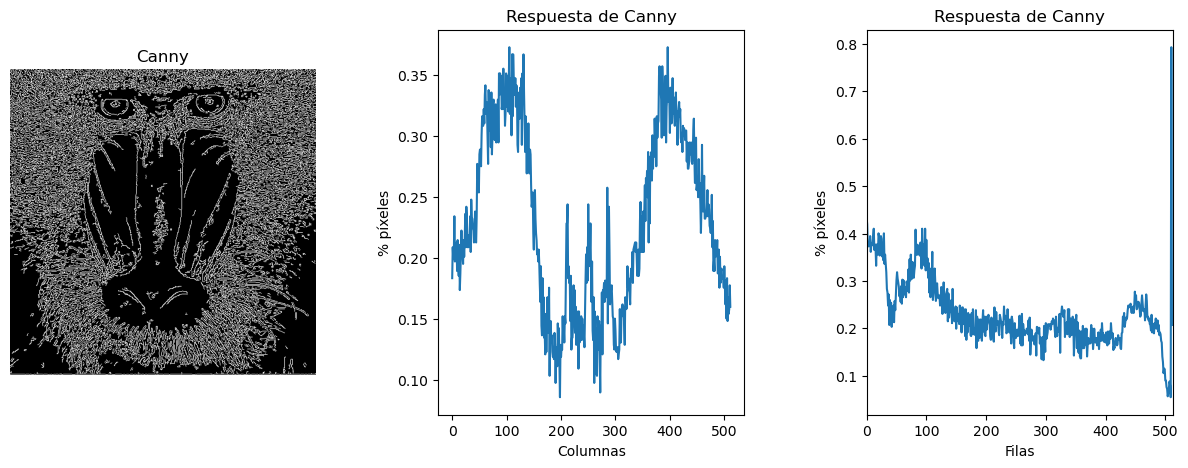

In [7]:
#Si muestras el contenido de la imagen resultado, son valores 0 o 255
#print(canny)
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * canny.shape[0])
rows = row_counts[:,0] / (255 * canny.shape[1])

# Encuentra el máximo valor para filas y columnas
max_row_value = row_counts.max()
max_col_value = col_counts.max()

# Encuentra el umbral para superar el 95% del máximo
threshold_row = 0.95 * max_row_value
threshold_col = 0.95 * max_col_value

# Encuentra el número de valores que superan el umbral para filas y columnas
num_values_above_threshold_row = len(row_counts[row_counts > threshold_row])
num_values_above_threshold_col = len(col_counts[col_counts > threshold_col])

print(f"El máximo valor para filas es: {max_row_value}")
print(f"El máximo valor para columnas es: {max_col_value}")
print(f"Número de valores que superan el 95% del máximo en filas: {num_values_above_threshold_row}")
print(f"Número de valores que superan el 95% del máximo en columnas: {num_values_above_threshold_col}")

#Muestra dicha cuenta gráficamente
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 3, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)

plt.subplot(1, 3, 3)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)

plt.subplots_adjust(wspace=0.4)  
plt.subplots_adjust(hspace=0.4) 

#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])

Sobel. Cuando hay un borde, el valor de intensidad de los píxeles cercanos cambia de forma notable, calcular las derivadas proporciona una evidencia de dicho cambio. El operador de Sobel aproximar el cálculo de la derivada aplicando un kernel de tamaño impar basado en el patrón [1 2 1]

TAREA: Elige otra imagen, muestra el contenido de alguna de las imágenes resultado de Sobel antes y después de ajustar la escala

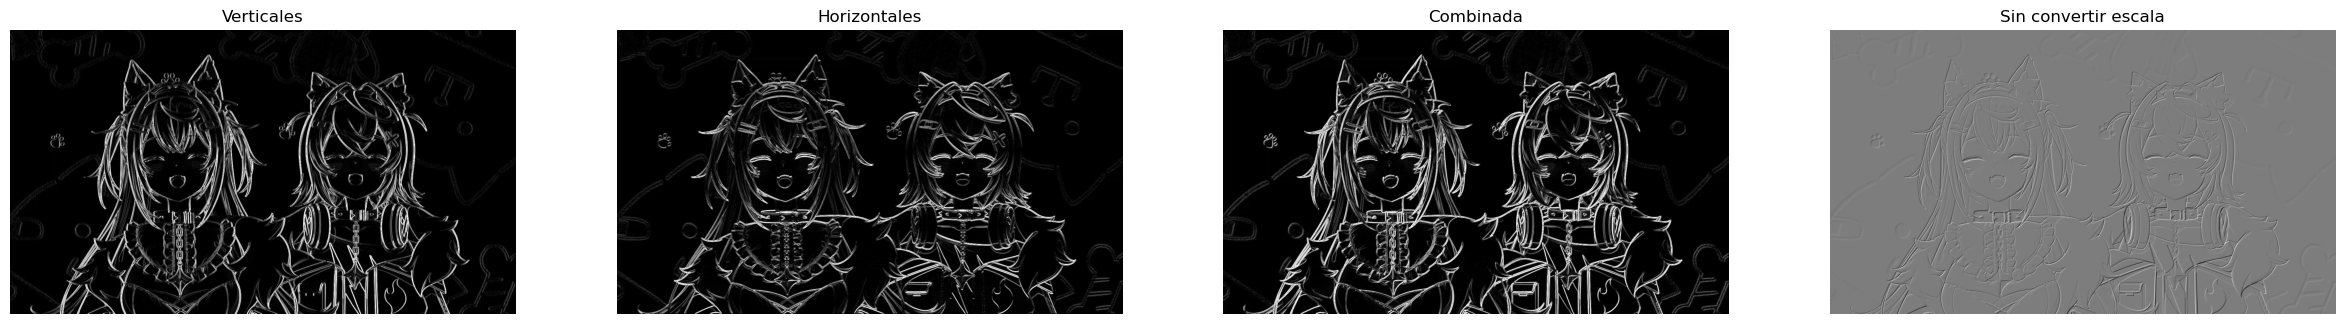

In [8]:
# Gaussiana para suavizar la imagen original
ggris = cv2.GaussianBlur(gris2, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Muestra ambos resultados
plt.figure(figsize=(30, 10))
plt.subplot(1, 4, 1)
plt.axis("off")
plt.title('Verticales')
#Verticales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Sin convertir escala

plt.subplot(1, 4, 2)
plt.axis("off")
plt.title('Horizontales')
#Horizontales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Sin convertir escala

plt.subplot(1, 4, 3)
plt.axis("off")
plt.title('Combinada')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobel), cmap='gray')

plt.subplot(1, 4, 4)
plt.axis("off")
plt.title('Sin convertir escala') 
plt.imshow(sobel, cmap='gray') #Sin convertir escala
plt.show()

Umbralizado de una imagen

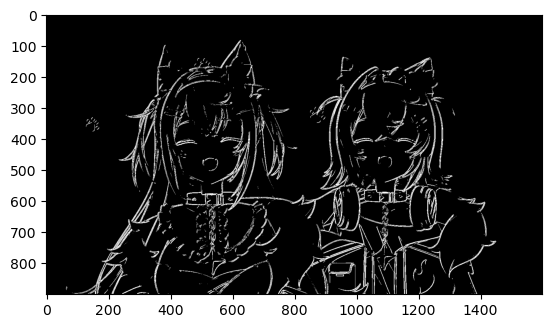

El máximo valor para filas es: 61455
El máximo valor para columnas es: 62475
Número de valores que superan el 95% del máximo en filas: 4
Número de valores que superan el 95% del máximo en columnas: 1


(0.0, 512.0)

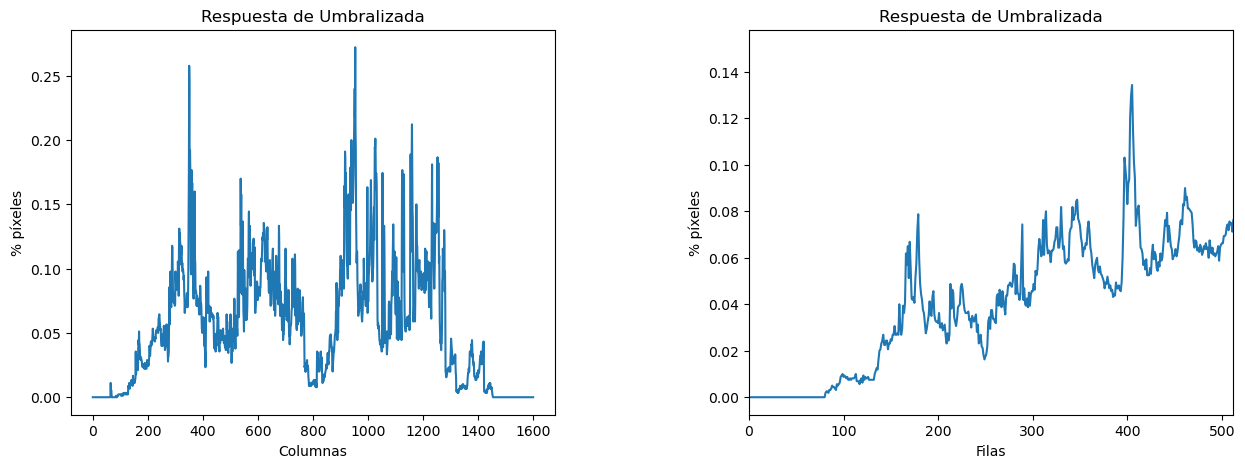

In [9]:
sobel = cv2.convertScaleAbs(sobel)
#Define valor umbral
valorUmbral = 175 #Prueba otros valores
#Obtiene imagen umbralizada para dicho valor definido
res, imagenUmbralizada = cv2.threshold(sobel, valorUmbral, 255, cv2.THRESH_BINARY)
#Muestra resultado
plt.imshow(imagenUmbralizada, cmap='gray') #Visualiza con mapa de color gris
plt.show()

col_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
row_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * sobel.shape[0])
rows = row_counts[:,0] / (255 * sobel.shape[1])

# Encuentra el máximo valor para filas y columnas
max_row_value = row_counts.max()
max_col_value = col_counts.max()

# Encuentra el umbral para superar el 95% del máximo
threshold_row = 0.95 * max_row_value
threshold_col = 0.95 * max_col_value

# Encuentra el número de valores que superan el umbral para filas y columnas
num_values_above_threshold_row = len(row_counts[row_counts > threshold_row])
num_values_above_threshold_col = len(col_counts[col_counts > threshold_col])

print(f"El máximo valor para filas es: {max_row_value}")
print(f"El máximo valor para columnas es: {max_col_value}")
print(f"Número de valores que superan el 95% del máximo en filas: {num_values_above_threshold_row}")
print(f"Número de valores que superan el 95% del máximo en columnas: {num_values_above_threshold_col}")

#Muestra dicha cuenta gráficamente
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Respuesta de Umbralizada")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)

plt.subplot(1, 2, 2)
plt.title("Respuesta de Umbralizada")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)

plt.subplots_adjust(wspace=0.4)  
plt.subplots_adjust(hspace=0.4) 

#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])

El histograma de una imagen aporta información sobre el valor de umbral a elegir para ciertas situaciones

(0.0, 256.0)

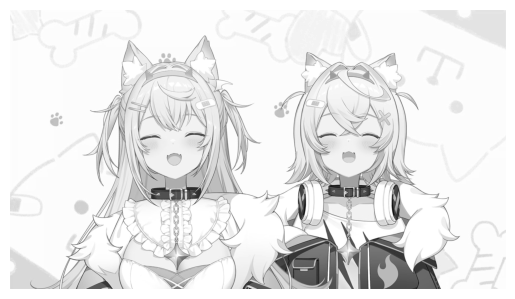

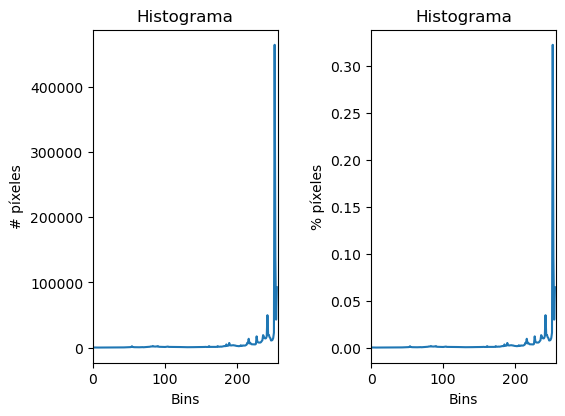

In [10]:
#Cálculo del histograma de una imagen en escala de grises
hist = cv2.calcHist([gris2], [0], None, [256], [0, 256])

plt.figure()
plt.axis("off")
plt.imshow(gris2, cmap='gray')

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

#Normaliza el histograma en base al número de píxeles y lo muestra
hist /= hist.sum()

plt.subplot(1, 2, 2)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("% píxeles")
plt.tight_layout(pad=3.0) #separación entre plots
plt.plot(hist)
plt.xlim([0, 256])

Diferencia de imágenes

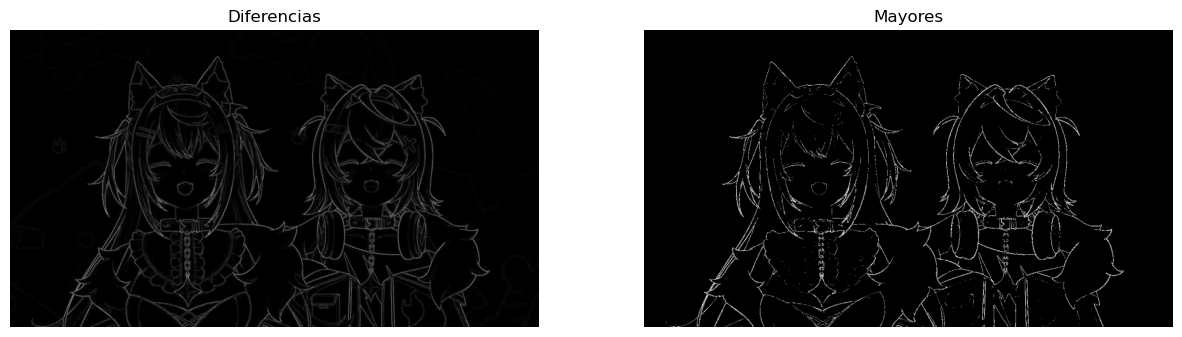

In [11]:
#Calcula la diferencia entre dos imágenes
#Utiliza la imagen original y la obtenida tras aplicar la gaussiana
dif = cv2.absdiff(gris2, ggris)

#Visualiza
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Diferencias")
plt.axis("off")
plt.imshow(dif, cmap='gray') 

#Zonas de mayor diferencia tras aplicar umbral
res, imgdif = cv2.threshold(dif, 30, 255, cv2.THRESH_BINARY)
#Visualiza
plt.subplot(1, 2, 2)
plt.title("Mayores")
plt.axis("off")
plt.imshow(imgdif, cmap='gray') 
plt.show()


Webcam y sustracción de fotogramas

In [ ]:
vid = cv2.VideoCapture(0)

#Marca de inicio
disponible = 0 
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        if disponible > 0:
            dif = cv2.absdiff(frame, pframe)        
            # Muestra resultado
            cv2.imshow('Diferencia', dif)        

        else:
            disponible = 1

        #Copia fotograma actual para la diferencia en el siguiente forograma
        pframe = frame.copy()
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Webcam y sustracción de modelo del fondo

In [ ]:
vid = cv2.VideoCapture(0)


# Fondo
# Inicializa la sustracción del fondo con mezcla de gaussianas y detección de sombras
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)
  


while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Aplica efecto espejo sobre la entrada
        framem=cv2.flip(frame, 1)

        
        #Con un segundo parámerto se puede definir máscara con zonas a actualizar
        objetos = eliminadorFondo.apply(framem)
        #objetos = eliminadorFondo.apply(framem, objetos, 0)  #No actualiza el fondo
        # Obtiene fondo
        background = eliminadorFondo.getBackgroundImage()

        # Muestra resultado
        cv2.imshow('Fotograma', objetos)
        # Muestra fondo
        cv2.imshow('Fondo', background)
  
   
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()


TAREA: Asumiendo que quieren mostrar a personas que no forman parte del curso de VC el comportamiento de una o varias funcioens de las vistas hasta este momento aplicadas sobre la entrada de la webcam. ¿Cuál(es) escogerían?

In [ ]:
vid = cv2.VideoCapture(0)

# Marca de inicio
while True:      
    # fotograma a fotograma
    success, frame = vid.read()

    if not success:
        print("Error reading frame")
        break

    frameGris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frameBlur = cv2.GaussianBlur(frameGris, (3, 3), 0)

    framex = cv2.Sobel(frameBlur, cv2.CV_64F, 1, 0)  # x
    framey = cv2.Sobel(frameBlur, cv2.CV_64F, 0, 1)  # y

    frame = cv2.add(framex, framey)

    cv2.imshow('Sobel', cv2.convertScaleAbs(frame))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) propongan (los componentes de cada grupo) una reinterpretación del procesamiento de imágenes con las técnicas vistas o que conozcan.

In [3]:
# Inicializa la cámara
vid = cv2.VideoCapture(0)

# Número de fotogramas anteriores a mantener para el efecto de estela
num_frames = 5
prev_frames = []

while True:
    # Captura un fotograma
    ret, frame = vid.read()
    
    if ret:
        # Agrega el fotograma actual a la lista de fotogramas anteriores
        prev_frames.append(frame.copy())
        
        # Mantiene solo los últimos N fotogramas
        if len(prev_frames) > num_frames:
            prev_frames.pop(0)
        
        blended_frame = frame.copy()
        alpha = 0.5  
        for prev_frame in prev_frames:
            blended_frame = cv2.addWeighted(blended_frame, 1 - alpha, prev_frame, alpha, 0)
        
        cv2.imshow('Vid', blended_frame)
    
    # Detener la ejecución con la tecla ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()